In [32]:
#importing required libraries
from skimage.io import imread,imsave, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import numpy as np
from skimage import img_as_ubyte
from sklearn import svm
from sklearn.model_selection import GridSearchCV

In [18]:
flat_data_arr = []
target_arr = []
files = []

In [56]:
def create_hog(cls , o=9, ppc= 8, cpb =2 ):
    imdir = pathtofolder
    ext = ['png', 'jpg', 'gif']    # Add image formats here
    [files.extend(glob.glob(imdir + '*.' + e)) for e in ext]
    images = [imread(file) for file in files]
    for i in range(len(images)): 
        resized_img = resize(images[i], (128, 64))
        fd, hog_img = hog(resized_img, orientations=o, pixels_per_cell=(ppc,ppc), cells_per_block=(cpb, cpb), transform_sqrt=True, block_norm= 'L1', visualize=True)
        flat_data_arr.append(hog_img.flatten())
        target_arr.append(cls)

In [5]:
pathtofolder = 'C:\\Users\\Arshi\\ASSIGNMENT1_CV\\INRIA_Dataset_Samples\\Train\\neg\\'
create_hog(0)
pathtofolder = 'C:\\Users\\Arshi\\ASSIGNMENT1_CV\\INRIA_Dataset_Samples\\Train\\pos\\'
create_hog(1)

In [6]:
X_train = np.array(flat_data_arr)
Y_train = np.array(target_arr)
print(X_train.shape)


(3634, 8192)


In [7]:
svc = svm.LinearSVC(max_iter =5000)
svc.fit (X_train,Y_train)

LinearSVC(max_iter=5000)

In [20]:
pathtofolder = 'C:\\Users\\Arshi\\ASSIGNMENT1_CV\\INRIA_Dataset_Samples\\Test\\neg\\'
create_hog(0)
pathtofolder = 'C:\\Users\\Arshi\\ASSIGNMENT1_CV\\INRIA_Dataset_Samples\\Test\\pos\\'
create_hog(1)

In [9]:
X_test = np.array(flat_data_arr)
Y_test = np.array(target_arr)
y_pred=svc.predict(X_test)

In [10]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1671
           1       0.99      0.94      0.97      3548

    accuracy                           0.96      5219
   macro avg       0.94      0.96      0.95      5219
weighted avg       0.96      0.96      0.96      5219



incorrectly classified images
(648, 486, 3)
(134, 70, 4)
(134, 70, 4)


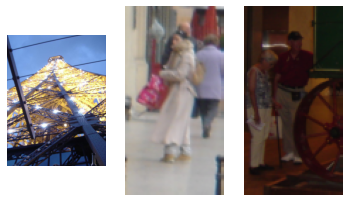

In [54]:
#Displaying misclassified images
count = 1  
print("incorrectly classified images")
for i in range(len(files)):
    if count == 4:
        break
    elif y_pred[i] != Y_test[i]:
        plt.axis('off')
        plt.subplot(1, 3, count )
        img = imread(files[i])
        print(img.shape)
        plt.imshow(img)
        count += 1
plt.axis('off')
plt.show()

correctly classified images


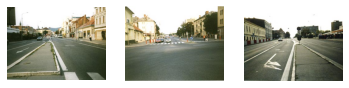

In [55]:
#Displaying misclassified images
count = 1  
print("correctly classified images")
for i in range(len(files)):
    if count == 4:
        break
    elif y_pred[i] == Y_test[i]:
        plt.axis('off')
        plt.subplot(1, 3, count )
        img = imread(files[i])
        plt.imshow(img)
        count += 1
plt.axis('off')
plt.show()


In [53]:
#for saving trained model using joblib
from joblib import dump, load
dump(svc, 'hog_svm.joblib') 

['hog_svm.joblib']

In [ ]:
#for loading trained model using joblib
clf = load('hog_svm.joblib') 

In [57]:
# Passing different parameter to hog
pathtofolder = 'C:\\Users\\Arshi\\ASSIGNMENT1_CV\\INRIA_Dataset_Samples\\Train\\neg\\'
create_hog(0 , 9, 16, 4)
pathtofolder = 'C:\\Users\\Arshi\\ASSIGNMENT1_CV\\INRIA_Dataset_Samples\\Train\\pos\\'
create_hog(0 , 9, 16, 4)

In [58]:
X_train = np.array(flat_data_arr)
Y_train = np.array(target_arr)
svc = svm.LinearSVC(max_iter =5000)
svc.fit (X_train,Y_train)


LinearSVC(max_iter=5000)

In [59]:
pathtofolder = 'C:\\Users\\Arshi\\ASSIGNMENT1_CV\\INRIA_Dataset_Samples\\Test\\neg\\'
create_hog(0 , 9, 16, 4)
pathtofolder = 'C:\\Users\\Arshi\\ASSIGNMENT1_CV\\INRIA_Dataset_Samples\\Test\\pos\\'
create_hog(1 , 9, 16, 4)

In [60]:
X_test = np.array(flat_data_arr)
Y_test = np.array(target_arr)
y_pred=svc.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.98      0.79     14147
           1       0.83      0.17      0.28      8389

    accuracy                           0.68     22536
   macro avg       0.75      0.57      0.54     22536
weighted avg       0.73      0.68      0.60     22536

